<a href="https://colab.research.google.com/github/Aditya11620/majorpro/blob/main/phishing_majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

data = pd.read_csv("drive/My Drive/mp/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
#To drop unecessary columns
data = data.drop(['Index'],axis = 1)

In [5]:

data.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,0.628551,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,0.777804,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#To display all the columns name
data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [7]:
#To display the datatypes of all the columns.
data.dtypes

UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort             int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
InfoEmail              int64
AbnormalURL            int64
WebsiteForwarding      int64
StatusBarCust          int64
DisableRightClick      int64
UsingPopupWindow       int64
IframeRedirection      int64
AgeofDomain            int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
StatsReport            int64
class                  int64
dtype: object

In [8]:
#To display the size of the dataset along with the column size.
data.shape

(11054, 31)

In [9]:
#To display the whole dataset
data

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


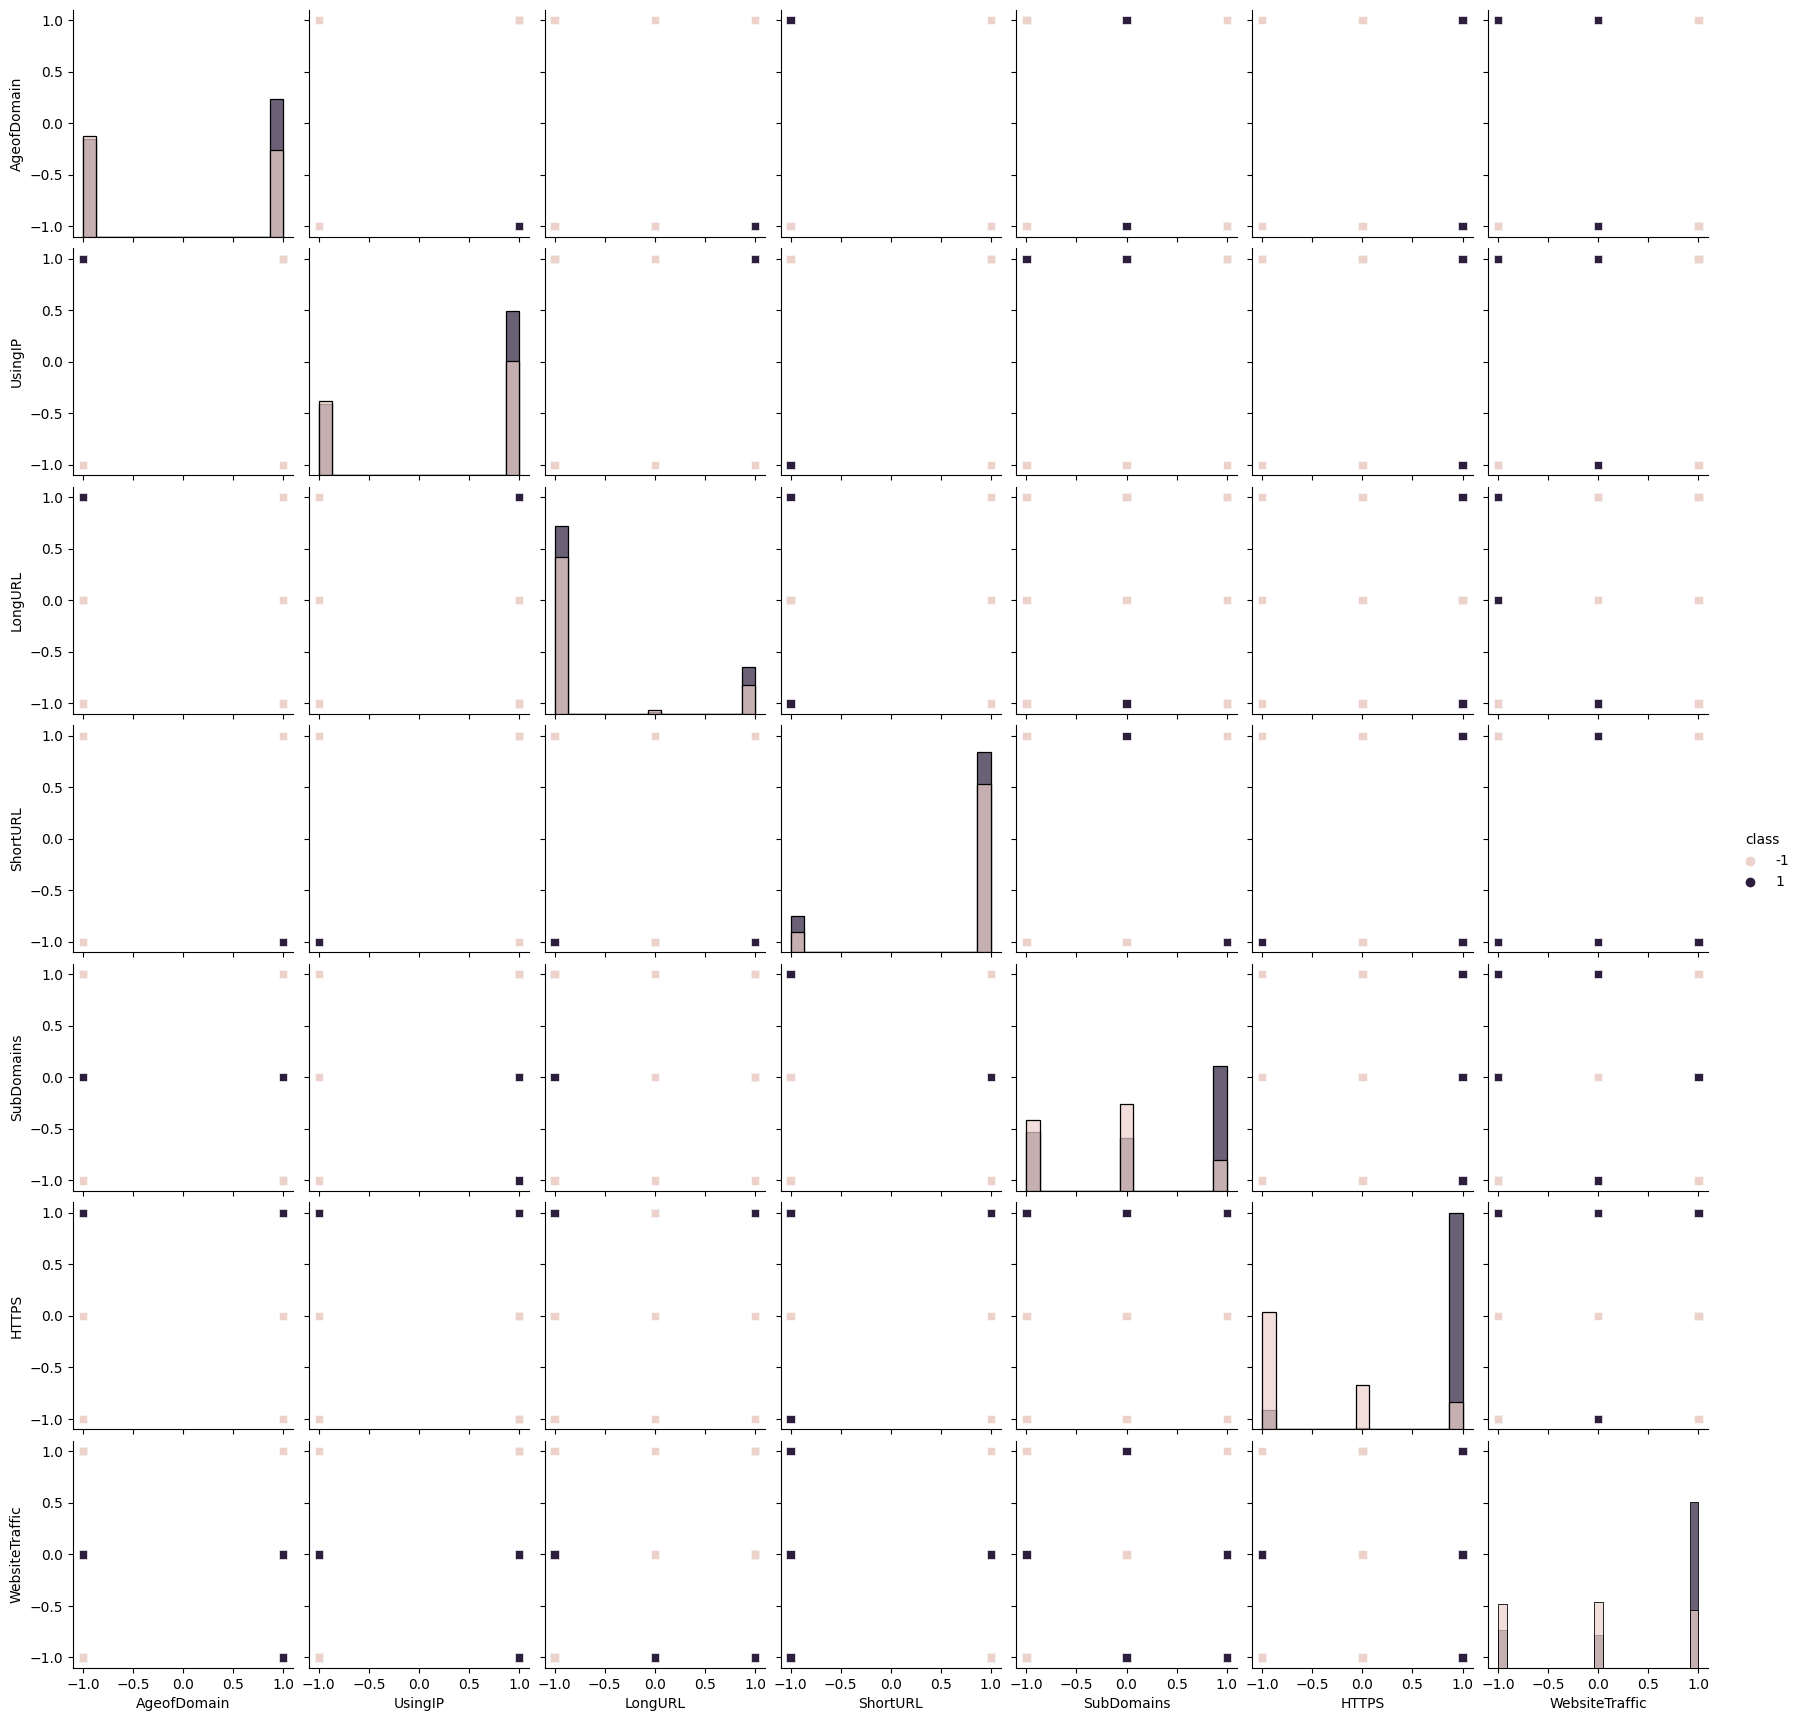

In [10]:
#Creating a pairplot of the specific features.
features = ['AgeofDomain', 'UsingIP','LongURL','ShortURL','SubDomains', 'HTTPS', 'WebsiteTraffic', 'class']
data_subset = data[features]

sns.pairplot(data_subset, hue='class', diag_kind='hist', diag_kws={'alpha': 0.7}, markers='s')
plt.show()


In [11]:
columns_of_interest = [ 'LongURL', 'ShortURL','AnchorURL','AbnormalURL']
data_subset = data[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = data_subset.corr()

# correlation matrix
print(correlation_matrix)

              LongURL  ShortURL  AnchorURL  AbnormalURL
LongURL      1.000000 -0.097976  -0.023153    -0.106347
ShortURL    -0.097976  1.000000   0.000607     0.739573
AnchorURL   -0.023153  0.000607   1.000000    -0.010870
AbnormalURL -0.106347  0.739573  -0.010870     1.000000


Text(0.5, 1.0, 'Phishing Count')

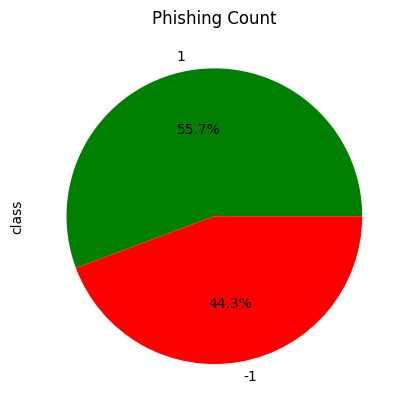

In [61]:

data['class'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['green','red'])
plt.title("Phishing Count")

In [16]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [17]:
# Splitting the data into training and testing data:(70,30)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7737, 30), (7737,), (3317, 30), (3317,))

In [18]:
ML_Model = []
accuracy = []
f1_score_new = []
recall = []
precision = []
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score_new.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))




In [64]:
# Logistic regression model

In [65]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

# fitting the model
log.fit(X_train,y_train)

LogisticRegression()

In [66]:
#predicting the value,

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_accuracy = accuracy_score(y_train, y_train_log)
test_accuracy = accuracy_score(y_test, y_test_log)
train_precision = precision_score(y_train, y_train_log)
train_recall = recall_score(y_train, y_train_log)
train_f1 = f1_score(y_train, y_train_log)
test_precision = precision_score(y_test, y_test_log)
test_recall = recall_score(y_test, y_test_log)
test_f1 = f1_score(y_test, y_test_log)
print("LR : Training accuracy: {:.3f}".format(train_accuracy))
print("LR : Training precision: {:.3f}".format(train_precision))
print("LR : Training recall: {:.3f}".format(train_recall))
print("LR : Training F1-score: {:.3f}".format(train_f1))
print("LR : Testing accuracy: {:.3f}".format(test_accuracy))
print("LR : Testing precision: {:.3f}".format(test_precision))
print("LR : Testing recall: {:.3f}".format(test_recall))
print("LR : Testing F1-score: {:.3f}".format(test_f1))


LR : Training accuracy: 0.927
LR : Training precision: 0.927
LR : Training recall: 0.943
LR : Training F1-score: 0.935
LR : Testing accuracy: 0.934
LR : Testing precision: 0.930
LR : Testing recall: 0.953
LR : Testing F1-score: 0.941


In [76]:
storeResults('LR',test_accuracy,test_f1,
train_recall,train_precision)

Results stored for model:  LR
Test Accuracy:  0.9335142469470827
Test F1-score:  0.9412235105957617
Train Recall:  0.9431125558715969
Train Precision:  0.9265469061876247


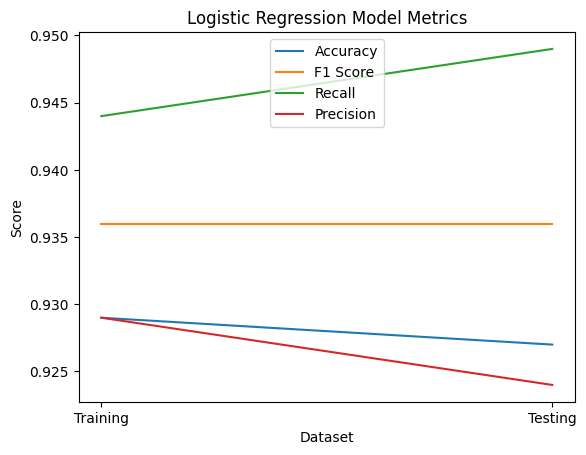

In [71]:
import matplotlib.pyplot as plt


acc_train_log = 0.929
acc_test_log = 0.927


f1_score_train_log = 0.936
f1_score_test_log = 0.936


recall_score_train_log = 0.944
recall_score_test_log = 0.949

precision_score_train_log = 0.929
precision_score_test_log = 0.924

labels = ['Training', 'Testing']
accuracy_values = [acc_train_log, acc_test_log]
f1_score_values = [f1_score_train_log, f1_score_test_log]
recall_values = [recall_score_train_log, recall_score_test_log]
precision_values = [precision_score_train_log, precision_score_test_log]

plt.plot(labels, accuracy_values, label='Accuracy')


plt.plot(labels, f1_score_values, label='F1 Score')

plt.plot(labels, recall_values, label='Recall')

plt.plot(labels, precision_values, label='Precision')


plt.xlabel('Dataset')
plt.ylabel('Score')
plt.title('Logistic Regression Model Metrics')
plt.legend()

plt.show()


In [25]:
#Support Vector Machine Algorithm

In [78]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)


In [80]:

svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [81]:


y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [82]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [0.1], 'kernel': ['rbf', 'linear']}
svc = GridSearchCV(SVC(), param_grid)
svc.fit(X_train, y_train)

y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

# Computing the performance metrics
train_accuracy_svc = accuracy_score(y_train, y_train_svc)
test_accuracy_svc = accuracy_score(y_test, y_test_svc)

train_f1_score_svc = f1_score(y_train, y_train_svc)
test_f1_score_svc = f1_score(y_test, y_test_svc)

train_recall_svc = recall_score(y_train, y_train_svc)
test_recall_svc = recall_score(y_test, y_test_svc)

train_precision_svc = precision_score(y_train, y_train_svc)
test_precision_svc = precision_score(y_test, y_test_svc)

# Printing the results
print("SVM : Training Accuracy: {:.3f}".format(train_accuracy_svc))
print("SVM : Testing Accuracy: {:.3f}".format(test_accuracy_svc))
print()
print("SVM : Training F1-score : {:.3f}".format(train_f1_score_svc))
print("SVM : Testing F1-score : {:.3f}".format(test_f1_score_svc))
print()
print("SVM : Training Recall : {:.3f}".format(train_recall_svc))
print("SVM : Testing Recall : {:.3f}".format(test_recall_svc))
print()
print("SVM : Training Precision : {:.3f}".format(train_precision_svc))
print("SVM : Testing Precision : {:.3f}".format(test_precision_svc))


SVM : Training Accuracy: 0.969
SVM : Testing Accuracy: 0.964

SVM : Training F1-score : 0.973
SVM : Testing F1-score : 0.968

SVM : Training Recall : 0.980
SVM : Testing Recall : 0.980

SVM : Training Precision : 0.965
SVM : Testing Precision : 0.957


In [83]:
# Storing the results
storeResults('Support Vector Machine', test_accuracy_svc, test_f1_score_svc,
             train_recall_svc, train_precision_svc)


Results stored for model:  Support Vector Machine
Test Accuracy:  0.9642695612844867
Test F1-score:  0.9683873549419768
Train Recall:  0.9804957334416904
Train Precision:  0.9650069986002799


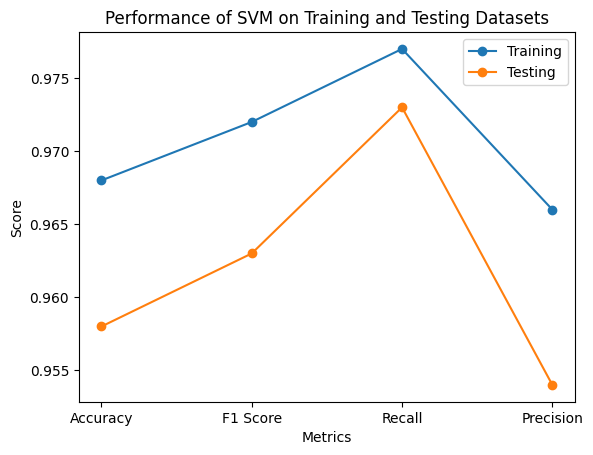

In [32]:
import matplotlib.pyplot as plt

# define the x-axis labels
labels = ['Accuracy', 'F1 Score', 'Recall', 'Precision']

# define the training and testing data
training_data = [0.968, 0.972, 0.977, 0.966]
testing_data = [0.958, 0.963, 0.973, 0.954]

# create the figure and axis
fig, ax = plt.subplots()

# plot the training and testing data as lines
ax.plot(labels, training_data, label='Training', marker='o')
ax.plot(labels, testing_data, label='Testing', marker='o')

# add a title and axis labels
ax.set_title('Performance of SVM on Training and Testing Datasets')
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')

# add a legend
ax.legend()

# display the plot
plt.show()


In [33]:
#Random Forest algorithm

In [34]:
from sklearn.ensemble import RandomForestClassifier



In [35]:
forest = RandomForestClassifier(n_estimators=50)

forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [36]:


y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [37]:

train_accuracy = accuracy_score(y_train, y_train_forest)
test_accuracy = accuracy_score(y_test, y_test_forest)
train_precision = precision_score(y_train, y_train_forest)
train_recall = recall_score(y_train, y_train_forest)
train_f1 = f1_score(y_train, y_train_forest)
test_precision = precision_score(y_test, y_test_forest)
test_recall = recall_score(y_test, y_test_forest)
test_f1 = f1_score(y_test, y_test_forest)
print("RF : Training accuracy: {:.3f}".format(train_accuracy))
print("RF : Training precision: {:.3f}".format(train_precision))
print("RF : Training recall: {:.3f}".format(train_recall))
print("RF : Training F1-score: {:.3f}".format(train_f1))
print("RF : Testing accuracy: {:.3f}".format(test_accuracy))
print("RF : Testing precision: {:.3f}".format(test_precision))
print("RF : Testing recall: {:.3f}".format(test_recall))
print("RF : Testing F1-score: {:.3f}".format(test_f1))

RF : Training accuracy: 0.992
RF : Training precision: 0.991
RF : Training recall: 0.994
RF : Training F1-score: 0.993
RF : Testing accuracy: 0.967
RF : Testing precision: 0.965
RF : Testing recall: 0.977
RF : Testing F1-score: 0.971


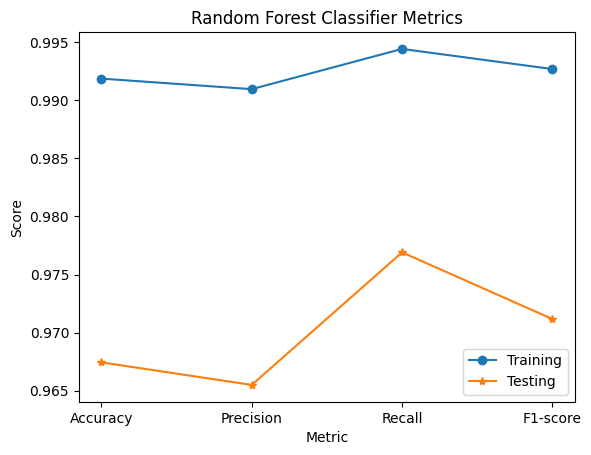

In [38]:
import matplotlib.pyplot as plt


labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_accuracy, train_precision, train_recall, train_f1]
test_values = [test_accuracy, test_precision, test_recall, test_f1]
x_range = range(len(labels))
plt.xticks(x_range, labels)
plt.plot(x_range, train_values, marker='o', label='Training')
plt.plot(x_range, test_values, marker='*', label='Testing')
plt.title('Random Forest Classifier Metrics')
plt.legend()
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()


In [39]:
storeResults('Random Forest',test_accuracy,test_f1,
train_recall,train_precision)

In [40]:
#K nearset neighbour

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
y_train_KNN = KNN.predict(X_train)
y_test_KNN = KNN.predict(X_test)

In [44]:
train_accuracy = accuracy_score(y_train, y_train_KNN)
test_accuracy = accuracy_score(y_test, y_test_KNN)
train_precision = precision_score(y_train, y_train_KNN)
train_recall = recall_score(y_train, y_train_KNN)
train_f1 = f1_score(y_train, y_train_KNN)
test_precision = precision_score(y_test, y_test_KNN)
test_recall = recall_score(y_test, y_test_KNN)
test_f1 = f1_score(y_test, y_test_KNN)
print("KNN : Training accuracy: {:.3f}".format(train_accuracy))
print("KNN : Training precision: {:.3f}".format(train_precision))
print("KNN : Training recall: {:.3f}".format(train_recall))
print("KNN : Training F1-score: {:.3f}".format(train_f1))
print("KNN : Testing accuracy: {:.3f}".format(test_accuracy))
print("KNN : Testing precision: {:.3f}".format(test_precision))
print("KNN : Testing recall: {:.3f}".format(test_recall))
print("KNN : Testing F1-score: {:.3f}".format(test_f1))

KNN : Training accuracy: 0.961
KNN : Training precision: 0.961
KNN : Training recall: 0.970
KNN : Training F1-score: 0.965
KNN : Testing accuracy: 0.942
KNN : Testing precision: 0.942
KNN : Testing recall: 0.955
KNN : Testing F1-score: 0.949


In [45]:
#storing the results
storeResults('KNN',test_accuracy,test_f1,
train_recall,train_precision)

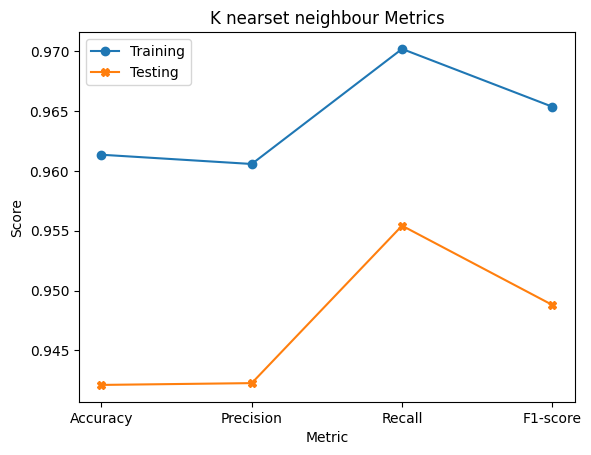

In [46]:
import matplotlib.pyplot as plt
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_accuracy, train_precision, train_recall, train_f1]
test_values = [test_accuracy, test_precision, test_recall, test_f1]
x_range = range(len(labels))
plt.xticks(x_range, labels)
plt.plot(x_range, train_values, marker='o', label='Training')
plt.plot(x_range, test_values, marker='X', label='Testing')
plt.title('K nearset neighbour Metrics')
plt.legend()
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

In [47]:
# Naive  Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [49]:
y_train_gnb = gnb.predict(X_train)
y_test_gnb = gnb.predict(X_test)

In [50]:
train_accuracy = accuracy_score(y_train, y_train_gnb)
test_accuracy = accuracy_score(y_test, y_test_gnb)
train_precision = precision_score(y_train, y_train_gnb)
train_recall = recall_score(y_train, y_train_gnb)
train_f1 = f1_score(y_train, y_train_gnb)
test_precision = precision_score(y_test, y_test_gnb)
test_recall = recall_score(y_test, y_test_gnb)
test_f1 = f1_score(y_test, y_test_gnb)
print("gnb : Training accuracy: {:.3f}".format(train_accuracy))
print("gnb : Training precision: {:.3f}".format(train_precision))
print("gnb : Training recall: {:.3f}".format(train_recall))
print("gnb : Training F1-score: {:.3f}".format(train_f1))
print("gnb : Testing accuracy: {:.3f}".format(test_accuracy))
print("gnb : Testing precision: {:.3f}".format(test_precision))
print("gnb : Testing recall: {:.3f}".format(test_recall))
print("gnb : Testing F1-score: {:.3f}".format(test_f1))

gnb : Training accuracy: 0.606
gnb : Training precision: 0.996
gnb : Training recall: 0.292
gnb : Training F1-score: 0.451
gnb : Testing accuracy: 0.606
gnb : Testing precision: 0.996
gnb : Testing recall: 0.299
gnb : Testing F1-score: 0.460


In [51]:
storeResults('gnb',test_accuracy,test_f1,
train_recall,train_precision)

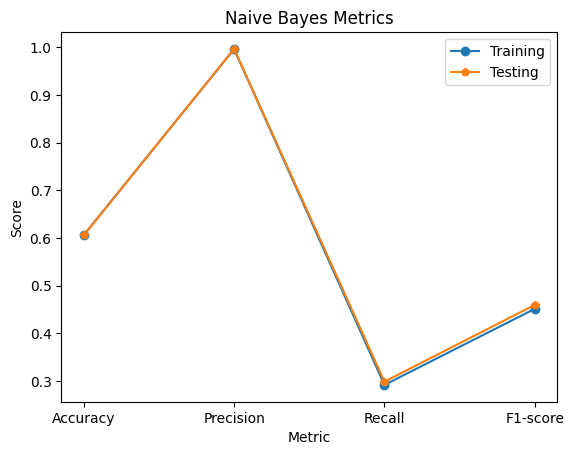

In [52]:
import matplotlib.pyplot as plt
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_accuracy, train_precision, train_recall, train_f1]
test_values = [test_accuracy, test_precision, test_recall, test_f1]
x_range = range(len(labels))
plt.xticks(x_range, labels)
plt.plot(x_range, train_values, marker='o', label='Training')
plt.plot(x_range, test_values, marker='p', label='Testing')
plt.title('Naive Bayes Metrics')
plt.legend()
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

In [53]:
#eXtreme Gradient Boost algorithm

In [54]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Map class labels to 0 and 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_train_xgb = model.predict(X_train)
y_test_xgb = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_xgb)
test_accuracy = accuracy_score(y_test, y_test_xgb)
train_precision = precision_score(y_train, y_train_xgb)
train_recall = recall_score(y_train, y_train_xgb)
train_f1 = f1_score(y_train, y_train_xgb)
test_precision = precision_score(y_test, y_test_xgb)
test_recall = recall_score(y_test, y_test_xgb)
test_f1 = f1_score(y_test, y_test_xgb)
print("XGBoost: Training accuracy: {:.3f}".format(train_accuracy))
print("XGBoost: Training precision: {:.3f}".format(train_precision))
print("XGBoost: Training recall: {:.3f}".format(train_recall))
print("XGBoost: Training F1-score: {:.3f}".format(train_f1))
print("XGBoost: Testing accuracy: {:.3f}".format(test_accuracy))
print("XGBoost: Testing precision: {:.3f}".format(test_precision))
print("XGBoost: Testing recall: {:.3f}".format(test_recall))
print("XGBoost: Testing F1-score: {:.3f}".format(test_f1))


XGBoost: Training accuracy: 0.987
XGBoost: Training precision: 0.984
XGBoost: Training recall: 0.993
XGBoost: Training F1-score: 0.988
XGBoost: Testing accuracy: 0.969
XGBoost: Testing precision: 0.964
XGBoost: Testing recall: 0.981
XGBoost: Testing F1-score: 0.973


In [55]:
storeResults('XGBoost',test_accuracy,test_f1,
train_recall,train_precision)

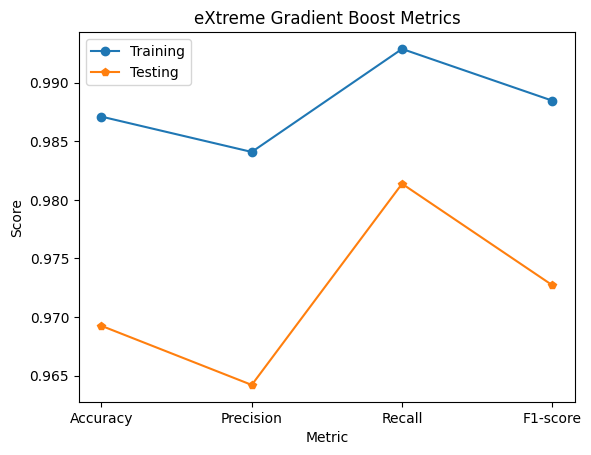

In [56]:
import matplotlib.pyplot as plt
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_accuracy, train_precision, train_recall, train_f1]
test_values = [test_accuracy, test_precision, test_recall, test_f1]
x_range = range(len(labels))
plt.xticks(x_range, labels)
plt.plot(x_range, train_values, marker='o', label='Training')
plt.plot(x_range, test_values, marker='p', label='Testing')
plt.title('eXtreme Gradient Boost Metrics')
plt.legend()
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


model_1 = RandomForestClassifier()
model_2 = LogisticRegression()
model_3 = SVC()
model_4 = KNeighborsClassifier()
model_5 = GaussianNB()
model_6 = xgb.XGBClassifier()

models = [model_1, model_2, model_3,model_4,model_5,model_6]

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Accuracy: {mean_accuracy}")
best_model = models[np.argmax(mean_accuracy)]
print(f"The best model is: {best_model.__class__.__name__}")


Model: RandomForestClassifier
Mean Accuracy: 0.9685158739416861
Model: LogisticRegression
Mean Accuracy: 0.9225618104459195
Model: SVC
Mean Accuracy: 0.9446345401744874
Model: KNeighborsClassifier
Mean Accuracy: 0.937576739912122
Model: GaussianNB
Mean Accuracy: 0.6055710341750729
Model: XGBClassifier
Mean Accuracy: 0.9676114286649844
The best model is: RandomForestClassifier


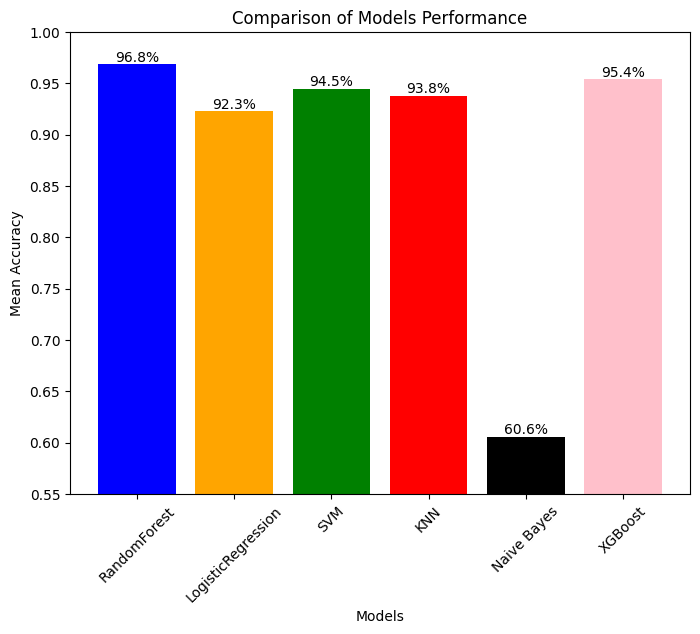

In [86]:
mean_accuracies = [0.968244503521062, 0.9225618104459195, 0.9446345401744874, 0.937576739912122, 0.6055710341750729, 0.9536114286649844]
model_names = ['RandomForest', 'LogisticRegression', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost']
colors = ['blue', 'orange', 'green', 'red', 'black', 'pink']

plt.figure(figsize=(8, 6))

#percentage on top
for i in range(len(mean_accuracies)):
    plt.text(i, mean_accuracies[i], '{:.1%}'.format(mean_accuracies[i]), ha='center', va='bottom')

plt.bar(model_names, mean_accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Comparison of Models Performance')
plt.ylim([0.55, 1.0])
plt.xticks(rotation=45)
plt.show()


In [59]:
import pickle

# dump information to that file
pickle.dump(forest, open('drive/My Drive/mp/phishing_save', 'wb'))